# The Titanic Dataset Data Exploration

## Preliminary Wrangling

This document explores a dataset containing fares and attributes for approximately 890 of the RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

Dataset: https://www.kaggle.com/c/titanic/data

The sinking of the Titanic is one of the most infamous shipwrecks in history.

In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sb.set_theme(style="darkgrid")

In [32]:
# load in the dataset into a pandas dataframe, print statistics
titanic = pd.read_csv('titanic_data_set.csv')

In [33]:
# high-level overview of data shape and composition
print(titanic.shape) #check the number of rows and columns
print(titanic.dtypes) # Check for various data types of columns
print(titanic.head(10))

(891, 15)
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0    

In [34]:
# descriptive statistics for numeric variables
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [35]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [37]:
# Checking the missing values 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

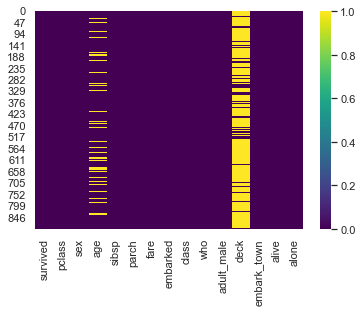

In [38]:
sb.heatmap(titanic.isnull(), cmap = 'viridis', cbar = True);

The deck shows most values to be null (Missing values) and some values are null in the age field aswell, also **2** values messing in the embark_twon

In [39]:
# Filling the missing values of age
titanic["age"] = titanic["age"].fillna(titanic['age'].median());

In [40]:
corrmat = titanic.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


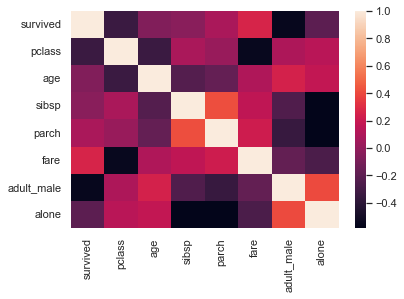

In [41]:
sb.heatmap(corrmat);

## The factors that Influence the Survivial of passenger from Titanic Ship Accident

### Investigation Overview

In this investigation, I'm most interested in figuring out what features are best for predicting the sirvival of the person in the titanic ship wreck dataset.

In this challenge, I'll try to answers the question: “what sorts of people were more likely to survive?” using passenger data (ie fare, age, gender, socio-economic class, etc).

### Dataset Overview
There are 891 observation in the dataset with 15 features (Survival, Pclass, Name, Sex, Age, Sibsp, Parch, Ticket, Fare, Cabin and Embarked). Most variables are categorical in nature, but the variables Fare, Pclass. some missing values where fill and child feature was add to the dataset.

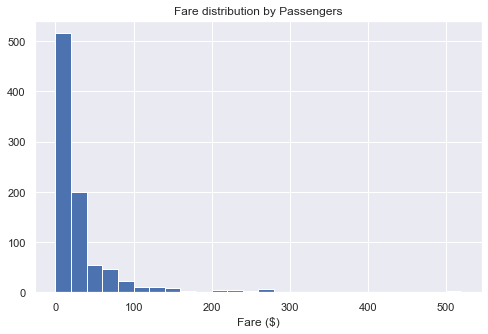

In [42]:
# start with a distribution of fare, by visually examine for outliers
binsize = 20
bins = np.arange(0, titanic['fare'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = titanic, x = 'fare', bins = bins)
plt.title("Fare distribution by Passengers")
plt.xlabel('Fare ($)')
plt.show()

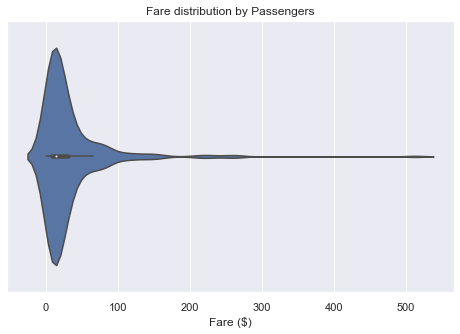

In [43]:
plt.figure(figsize=[8, 5])
sb.violinplot(data = titanic, x = 'fare');
plt.title("Fare distribution by Passengers")
plt.xlabel('Fare ($)')
plt.show()

As we notice in the distribution graph, fare between 0 to 300 represent 95% of the passengers. There were passenges fare more than 300 but they represent a small percentage.Yet it's unclear at the moment to dertimine how fare can influence the survival rate of a passenger.

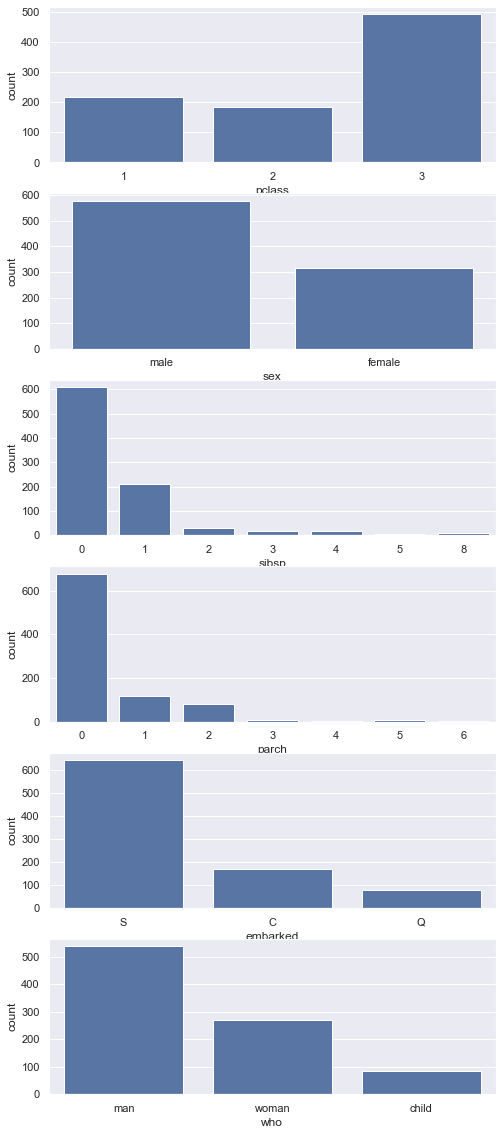

In [44]:
# let's plot all three together to get an idea of each ordinal variable's distribution.          
fig, ax = plt.subplots(nrows=6, figsize = [8,20])

default_color = sb.color_palette()[0]
sb.countplot(data = titanic, x = 'pclass', color = default_color, ax = ax[0])
sb.countplot(data = titanic, x = 'sex', color = default_color, ax = ax[1])
sb.countplot(data = titanic, x = 'sibsp', color = default_color, ax = ax[2])
sb.countplot(data = titanic, x = 'parch', color = default_color, ax = ax[3])
sb.countplot(data = titanic, x = 'embarked', color = default_color, ax = ax[4])
sb.countplot(data = titanic, x = 'who', color = default_color, ax = ax[5])

plt.show()

The Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) in the titanic dataset shows about **500** travelers are the majority belong in the **3 = 3rd .i.e**. most people travel in the 3rd Passenger class, whereas **little** above **200** passengers are traveled in the **1st class** cabin and less than **200** travel in the 2nd class.

The gender (sex) shows most of the passengers are male and fewer female travelers. The **Sibsp** - Number of Siblings/Spouses Aboard and **Parch** - Number of Parents/Children Aboard show most passengers are traveling alone. 

The Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) shows that most passengers embarked on the **Southampton** port, which is over 700 in numbers. The **who** represent here three groups that are adult men, women, and children. Few children traveled with their parents. 

I'll now move on to the other 'Survived' variables in the dataset: survived - survived (0 = No; 1 = Yes).

## Survived ##

In [45]:
# Check for survived passenger
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [46]:
# We've set here the survived Variable for the titanic survived to count the number of male and female present in our dataset
Died = titanic.survived == 0
Save = titanic.survived == 1

print(Save.sum())
print(titanic['survived'][titanic['sex'] == 'male'].value_counts())
print(titanic['survived'][titanic['sex'] == 'female'].value_counts())

342
0    468
1    109
Name: survived, dtype: int64
1    233
0     81
Name: survived, dtype: int64


### Visualising the survival of passenger (Passenger Survived)

Note: survived (0 = No; 1 = Yes) that's Zero (0) denote died and One (1) represent survived.

Based on the analysis there are **549** male passenger, **468** didn't  survived the accident, only **109** survived.
Whereas the **342** female passenger **233** of them survived and only **81** din't make it. We further investigate to determine the possible reasons influence the survival. In Total 342 passenger survived the accident.

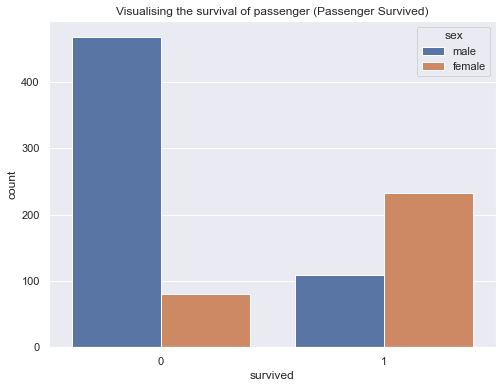

In [47]:
# The number of passenger survived by gender(sex)
plt.figure(figsize=[8, 6])
sb.countplot('survived', data=titanic, hue='sex');
plt.title('Visualising the survival of passenger (Passenger Survived)');

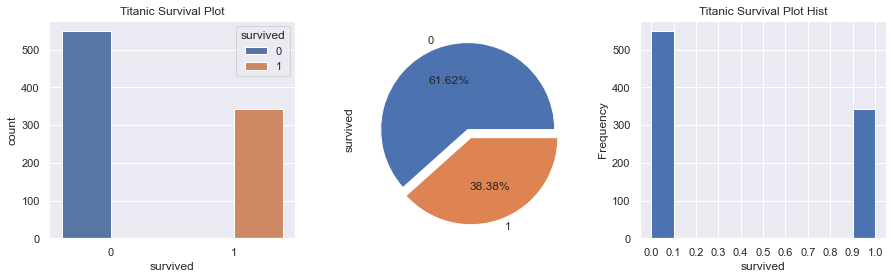

In [48]:
# plotting Titanic Survival Plot

f,(ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=False, sharex=False,
                          figsize=(15,4))
sb.countplot('survived', data = titanic, ax=ax1, hue='survived',)
ax1.set_title('Titanic Survival Plot');
#ax1.legend('survived')

explode = [0, 0.1]
p= titanic['survived'].value_counts().plot.pie(explode = explode, autopct = '%1.2f%%', ax = ax2)
ax2 = plt.title('Titanic Survival Plot Pie');
ax2=plt.xlabel('survived');

count, bin_edges = np.histogram(titanic['survived'])
titanic['survived'].plot.hist(ax=ax3, xticks =bin_edges)
ax3.set_title('Titanic Survival Plot Hist');
#ax3.legend()
ax3=plt.xlabel('survived')

plt.show();

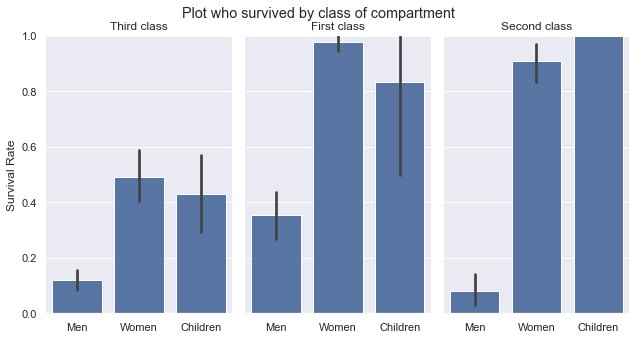

In [49]:
# Let's plot who survived the shipwreck in all passenger groups
# Who respresent the people be it adults or children 
g = sb.catplot(
    data=titanic, x="who", y="survived", col="class",
    kind="bar", height=5, aspect=.6,color=default_color 
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True);
g.fig.subplots_adjust(top=0.9)
plt.suptitle('Plot who survived by class of compartment')
plt.show();

In the case of the training dataset of the titanic **549** which is about **61.62%** Didn't survived the crashed. whereas **342** whis sum up to **38.38%** in the dataset survived the crashed. Please note that Survival - Survival (0 = No; 1 = Yes).
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I made some simple calculations to prepare the dataset for graph presentation. Calculations such as value count, sum, etc.  after investigating the graphs, I draw the following observation.

-   **38.38 %** Travellers Survived the crash, whereas **61.62%** people Died
-	Most people travelled in the 3rd Class category. 
-	Most traveller are male gender (sex)
-	There are 600 passengers travelling alone.
-	Majority passenger embarked on the Southampton port
-	Apart of Adults children also travelled with their parents

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the dataset there is little adjustment made from the dataset, like added one column name **child** to differenciate  between adult and kids, filling some missing values using mean average of age. 

For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [50]:
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [51]:
# Extract some numberial variable to plot some coll
numeric_vars = ['pclass', 'age', 'sibsp', 'parch', 'fare']

In [52]:
# Let's plot describ a summery pivot table of numerical variables
pd.pivot_table(titanic, index = 'survived', values = ['pclass', 'age', 'sibsp', 'parch', 'fare'])

,age,fare,parch,pclass,sibsp
survived,,,,,
0,30.028233,22.117887,0.329690,2.531876,0.553734
1,28.291433,48.395408,0.464912,1.950292,0.473684


**The inference we can draw from this chart is:**

- The average age of survivors is **28**, so young people tend to survive more.
- People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. As most people tends to paid an average fare of **48**. Thus the rich survived, which is kind of a sad story in this scenario.
- In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates  And if you are a child, and have siblings, you have less of a chance of surviving

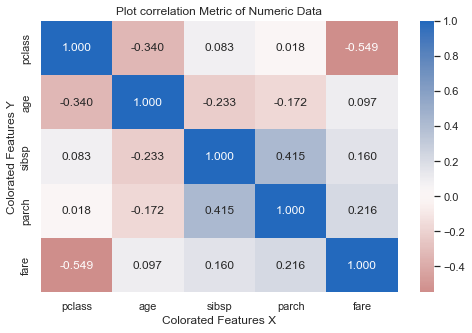

In [53]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(titanic[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Plot correlation Metric of Numeric Data')
plt.xlabel('Colorated Features X')
plt.ylabel('Colorated Features Y')
#plt.colorbar(label = 'Colormap');
plt.show()

Here we can see that dimensions are all highly correlated with one another and Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.

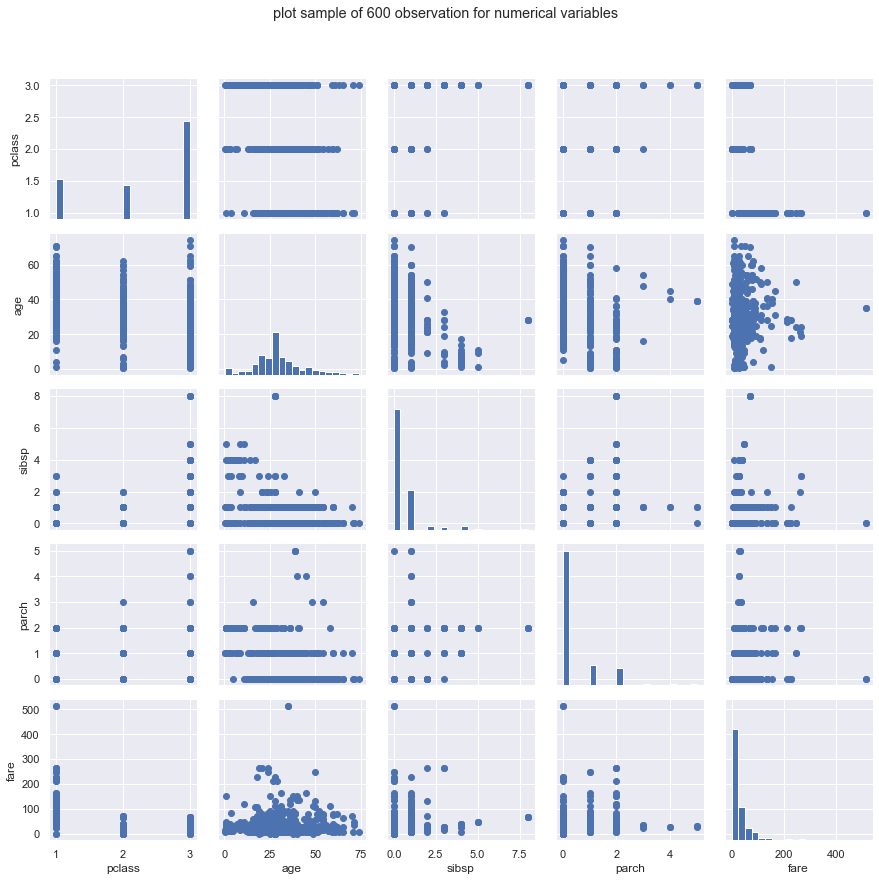

In [54]:
# plot sample of 600 observation for numerical variables so that our plot can render
# clearer and faster
samples = np.random.choice(titanic.shape[0], 600, replace = False)
titanic_samp = titanic.loc[samples,:]

g = sb.PairGrid(data = titanic_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('plot sample of 600 observation for numerical variables');

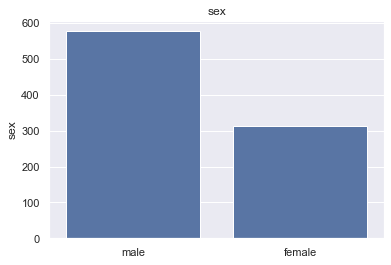

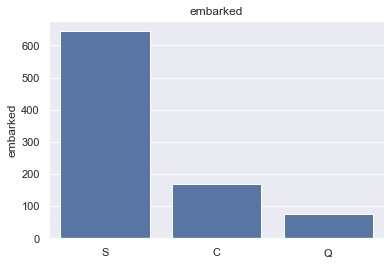

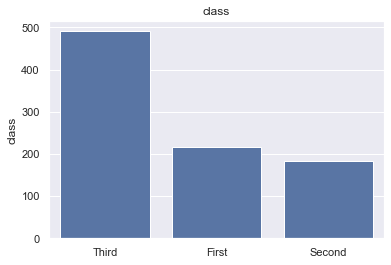

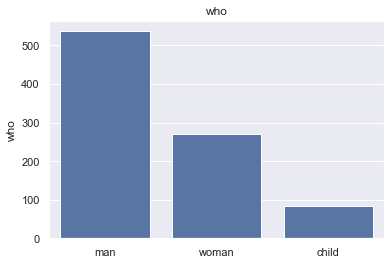

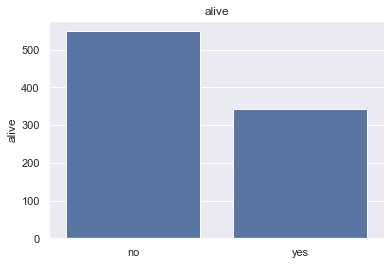

In [55]:
# Let's plot for few categoricial values
categoric_vars = titanic[['sex', 'embarked', 'class', 'who', 'alive']]

# For loop to plot the categorical feature above
for i in categoric_vars.columns:
    sb.barplot(categoric_vars[i].value_counts().index,categoric_vars[i].value_counts(), color=default_color).set_title(i) 
    plt.show()

Let's move on to looking at how fare and survived weight correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

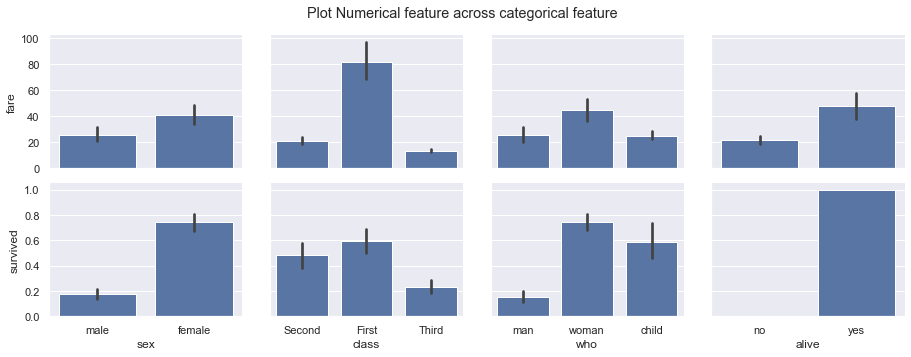

In [56]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
less_categoric_vars = ['sex', 'class', 'who', 'alive']

samples = np.random.choice(titanic.shape[0], 500, replace = False)
titanic_samp = titanic.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.barplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = titanic_samp, y_vars = ['fare', 'survived'], x_vars = less_categoric_vars,
                size = 2.5, aspect = 1.3)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Plot Numerical feature across categorical feature')
g.map(boxgrid)
plt.show();

Survived: Most of the people died in the shipwreck,  only around 300 people survived.
Pclass: The majority of the people traveling, had tickets to the 3rd class.
Sex: There were more males than females aboard the ship, they roughly double the amount.
Embarked: Most of the passengers boarded the ship from Southampton.

## Passenger Class (PClass)##

### Does the class of passenger play a role in Survival

In [57]:
# Check the number of passengers survived from the pclass
pclass_vcount = titanic['pclass'].value_counts()

print(pclass_vcount)
titanic.groupby(['pclass', 'survived'])['survived'].count()

3    491
1    216
2    184
Name: pclass, dtype: int64


pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [58]:
# Now we will do the pivot table above, but with our categorical variables, and compare them against survived variable,
# which is if people survived
print(pd.pivot_table(titanic, index = 'survived', columns = 'pclass', values = 'age' , aggfunc ='count'))

print(pd.pivot_table(titanic, index = 'survived', columns = 'sex', values = 'age' , aggfunc ='count'))

pclass      1   2    3
survived              
0          80  97  372
1         136  87  119
sex       female  male
survived              
0             81   468
1            233   109


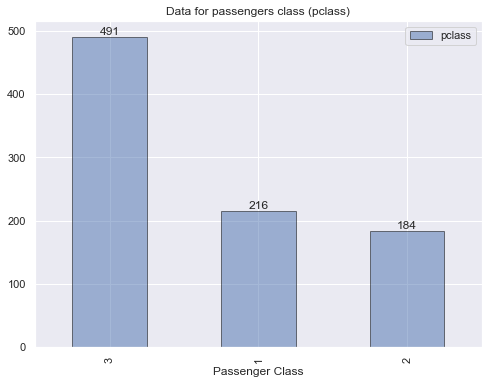

In [59]:
#### explore data for passengers class (pclass)
plt.figure(figsize=(8,6))
titanic.pclass.value_counts().plot(kind='bar',alpha=.5, ec='black')
plt.xlabel('Passenger Class')
plt.title("Data for passengers class (pclass)")
plt.legend()

category = [491,216,184]
for index,data in enumerate(category):
    plt.text(x=index, y=data, s=f'{data}',  ha='center', va='bottom')
      
plt.show();

We can see here the number of passenger belongs to each of the three classes. Third class hold the highest number of passengers **491** fellowed by First class **216** and second class **184**.

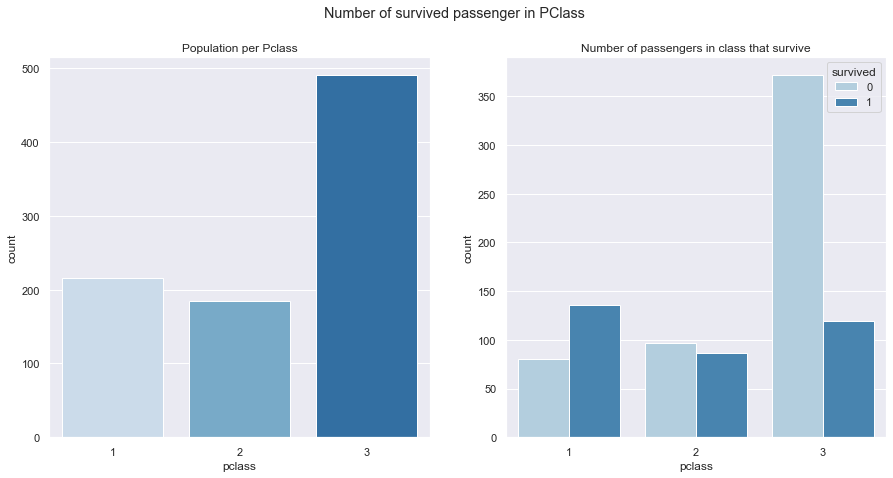

In [60]:
# since there's only two subplots to create, using the full data should be fine.
#plt.figure(figsize = [8, 15])

f,(ax1,ax2) = plt.subplots(ncols=2, sharey=False, sharex=False,
                          figsize=(15, 7))

# subplot 1: Number passeng in Pclass 
#plt.subplot(3, 1, 1)
plt.suptitle('Number of survived passenger in PClass')
g=sb.countplot('pclass', data = titanic, palette = 'Blues',ax=ax1)
g.set_title('Population per Pclass')
 

# subplot 2: Number of survived passenge in PClass
#ax = plt.subplot(3, 1, 2)
p=sb.countplot('pclass', data = titanic, hue = 'survived', palette = 'Blues', ax=ax2)
p=plt.title('Number of passengers in class that survive')


plt.show();

- The Chart confirms 1st class more likely survivied than other classes.
- The Chart confirms 3rd class more likely dead than other classes

### Titanic passenger class (pclass)
The percentage in the above plot show the number of passenger subscribe to each of the three classes in the  ship. As majority passenger are in the 3rd class, which also doubles the percentage of the two classes. 

1.	Pclass: People from the Frist class (1st) tend to survived the shipwreck more than the second or the Third class, even though the total number of travelers in the first seems much less than other classes. That’s to say the rich passenger are likely to survive the accident. 

2.	Sex: It shows many women survived, and most of the males died in the shipwreck. This is to say that “Woman and children first” actually applied in this scenario.

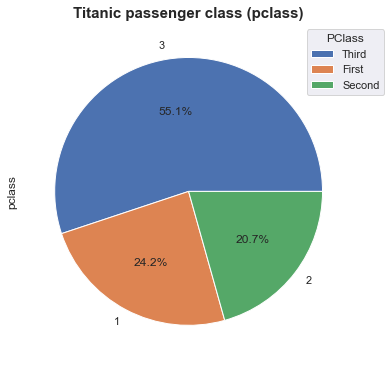

In [61]:
# Percentage of number of passenger in Pclass
plt.figure(figsize = [6, 8])
titanic['pclass'].value_counts().plot.pie(autopct = "%1.1f%%");
plt.title('Titanic passenger class (pclass)', fontsize=15,fontweight="bold")
plt.legend(['Third','First', 'Second'], title = 'PClass',loc='upper right',bbox_to_anchor=(1.1, 1.0))
plt.show();


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how Sex, Passengers Class (Pclass), Age and Fare varables  play influence roll in the survival of passenger from the ship wrecked.

### SEX  ###
### Does gender (sex) influence survival? ###

In [62]:
# Checked for gender over survived
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [63]:
# Extract the total number of male and female in the dataset
male = titanic.sex == 'male'
female = titanic.sex == 'female'

print(f'Total number of female: {female.sum()} Total number of male :',male.sum())
print(titanic['survived'][titanic['sex'] == 'female'].value_counts())
print('Total of No Sex:', female.sum() + male.sum())

Total number of female: 314 Total number of male : 577
1    233
0     81
Name: survived, dtype: int64
Total of No Sex: 891


### Sex(Gender) vs. Survival
From the left, we can see that **468** male passengers didnot survived the accident only **109** were lucky to survived. Whereas **233** women survived the accident and **81** female died. 

Out of **64.76%** of men that make up the population in the dataset,we say over **55%** died. while less than **10%** of women that died from the shipwreck in a total of **35.24%**.

From the right,the totall number of observation from the dataset is **891** and **577** were men, and **314** are women. This number includes both adults and children. 

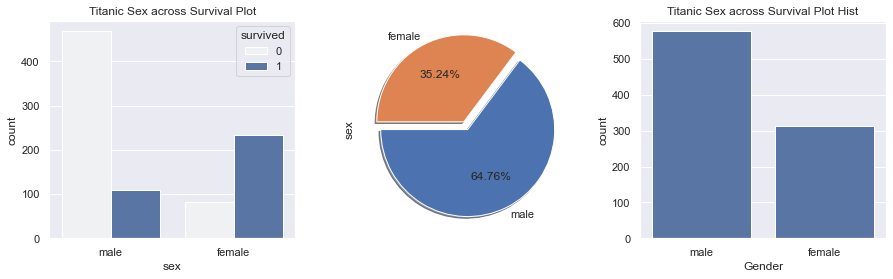

In [64]:
# Plot the percentage representation in the dataset
f,(ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=False, sharex=False,
                          figsize=(15,4))
sb.countplot('sex', data = titanic, ax=ax1, hue='survived',color = default_color)
ax1.set_title('Titanic Sex across Survival Plot');
#ax1.legend('survived')

explode = [0, 0.1]
p= titanic['sex'].value_counts().plot.pie(explode = explode, shadow=True,
                           startangle=180, autopct = '%1.2f%%', ax = ax2)
ax2 = plt.title('Titanic Sex across Survival Plot Pie');
ax2=plt.xlabel('survived');

sb.countplot('sex', data = titanic, ax=ax3, color = default_color)
ax3.set_title('Titanic Sex across Survival Plot Hist');
#ax3.legend()
ax3=plt.xlabel('Gender')

plt.show();

<Figure size 720x360 with 0 Axes>

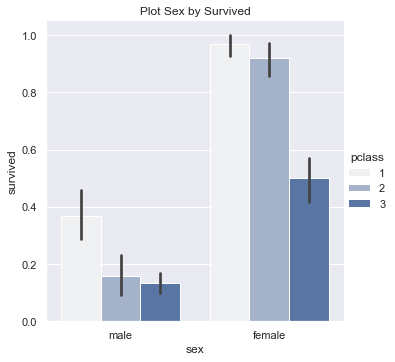

In [65]:
# Plot Sex by Survived
plt.figure(figsize = [10, 5])
disp=sb.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass',color=default_color)
disp.set(title='Plot Sex by Survived');
plt.show();

<Figure size 576x720 with 0 Axes>

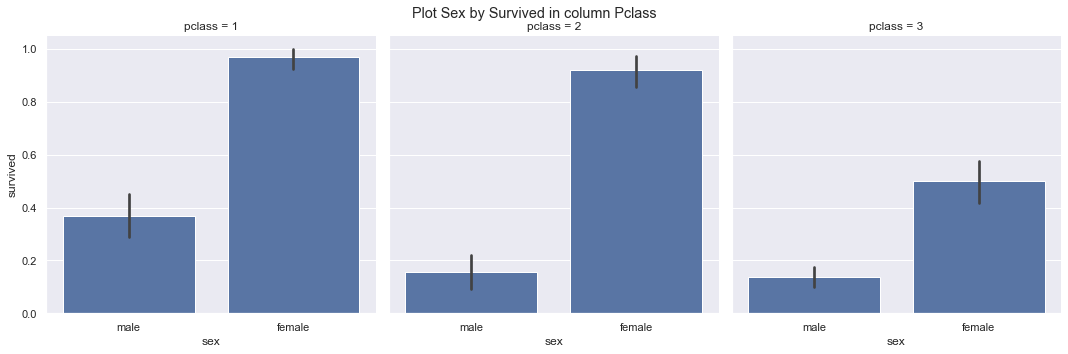

In [66]:
# further investigation Sex by Survived in group by pclass
plt.figure(figsize=[8,10])
disp=sb.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, col = 'pclass', 
                margin_titles=True, color=default_color);
disp.fig.subplots_adjust(top=0.9) # adjust the Figure in disp
disp.fig.suptitle('Plot Sex by Survived in column Pclass');
plt.show();

Inference from the two chart above:

Female from all the three class compartment i.e Pclass(1, 2, & 3) most seems to survived the accident compared to the Survival of male in all the classes for which their case of surviving the shipwrek is low. Note 1.0 from the Y axes represent Survived and 0.0 means died.

We can see from the three passenger class all the female bar rised to survived. 

<Figure size 576x720 with 0 Axes>

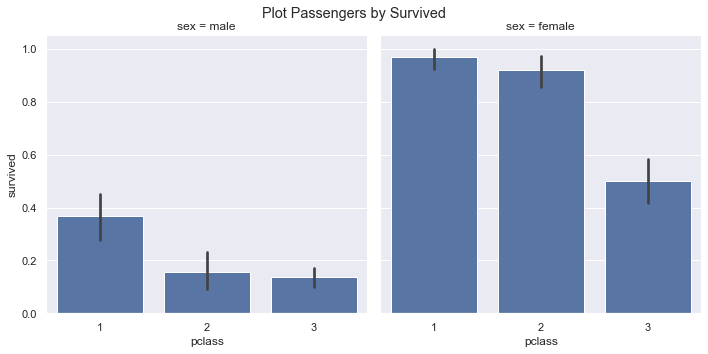

In [67]:
# Plot Passengers by Survived
plt.figure(figsize=[8,10])
g=sb.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic, col = 'sex', color=default_color);
g.fig.subplots_adjust(top=0.9) # adjust the Figure in disp
g.fig.suptitle('Plot Passengers by Survived');
plt.show();

Sex: Out of 314 sum total of female in our dataset **233** Survived the and the remaining **81** died 
Sex: There were more males than females aboard the ship, roughly double the amount.

Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.

**64.7%** make up the population of men onboard in the ship while the remaining were women, the number include both adults and kids


## AGE

### Does Age effect the chances of surviving?

Now let's examine the age distribution of the passengers and how does it affected their chances of survival.

We will start to plot the entire age population.

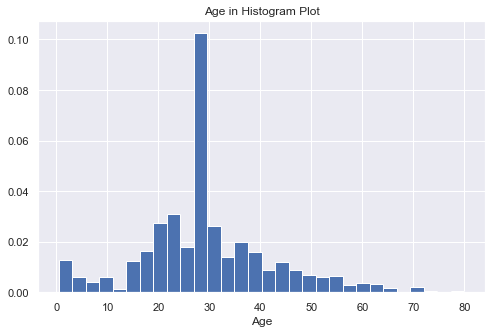

In [68]:
# Plot Age distribution chart
plt.figure(figsize=[8, 5])
titanic['age'].hist(bins = 30, density = True, color = default_color).set(title='Age in Histogram Plot')
plt.xlabel('Age')
#plt.title('Age in Histogram Plot')
plt.show()

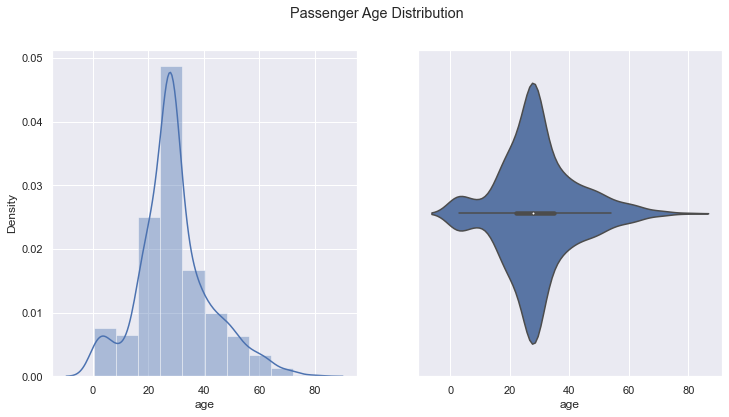

In [69]:
#'investigating further Age Distribution
f,(ax1,ax2) = plt.subplots(ncols=2, sharey=False, sharex=False,
                          figsize=(12, 6))
#ax=ax.flatten()
plt.suptitle('Passenger Age Distribution')
#ax.add_subplot(121)
sb.distplot(titanic['age'],bins=10, ax=ax1)

#ax.add_subplot(122)
sb.violinplot(titanic['age'],ax=ax2);

In [70]:
# Get summary descriptive statistics of age
ag= pd.DataFrame(titanic['age'].describe())

#Change the index labels and round the values reported
ag.index = ['Population Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
ag = ag.round(decimals=3)
ag

,age
Population Size,891.000
Mean,29.362
Std. Deviation,13.020
Min,0.420
25% Qt,22.000
Median,28.000
75% Qt,35.000
Max,80.000


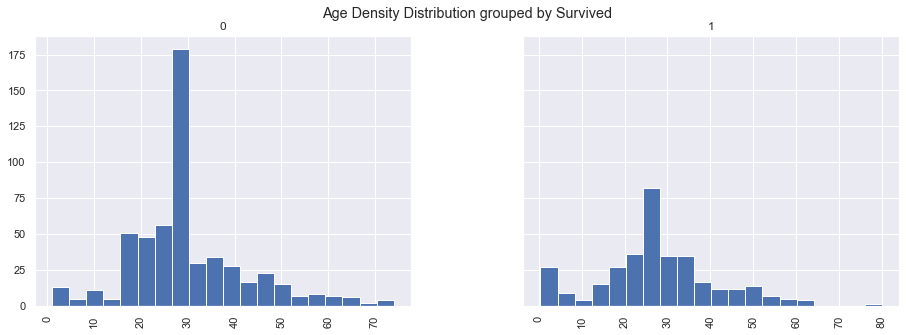

In [71]:
# Age Density Distribution grouped by Survived
ax=plt.figure(figsize=[15, 5])

titanic.hist(column="age",by="survived",sharey=True, ax=ax,bins=20);
plt.suptitle('Age Density Distribution grouped by Survived')

plt.show();

We observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived.

### Age vs. Survival
Passenger between the age range 20 to 30 years old were more survived. Further, the majority of the men who survived were between 18-30 years of age. Whereas the women who survived ranged between 14-40 majorly.

Also, we observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived.

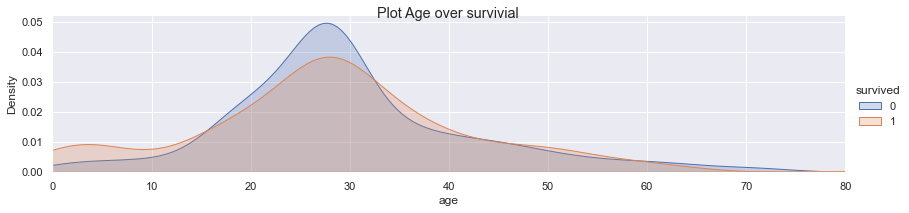

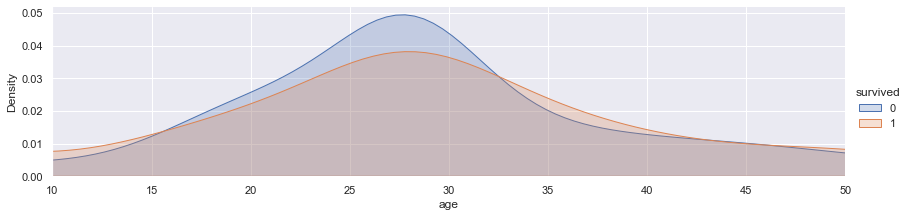

In [72]:
# Let's plot a facetgrid for age over survival of passengers
#plt.figure(figsize=[8,10])
facet = sb.FacetGrid(titanic, hue="survived",aspect=4)
facet.map(sb.kdeplot,'age',shade= True)
facet.set(xlim=(0, titanic['age'].max()))
facet.add_legend() 

plt.suptitle('Plot Age over survivial ')
facet = sb.FacetGrid(titanic, hue="survived",aspect=4)
facet.map(sb.kdeplot,'age',shade= True)
facet.set(xlim=(0, titanic['age'].max()))
facet.add_legend() 
facet.fig.subplots_adjust(top=1.0)
plt.xlim(10,50)
plt.show();

In [73]:
# Generate a new columns name child and assign to 'NaN'
titanic['child'] = float('NaN')

# Assigne One(1) to passenge under 18 and 0 to those above 18. 
titanic['child'][titanic['age'] < 18] = 1
titanic['child'][titanic['age'] >= 18] = 0

print(titanic['survived'][titanic['child'] == 1].value_counts())
print(titanic['survived'][titanic['child'] == 0].value_counts())

1    61
0    52
Name: survived, dtype: int64
0    497
1    281
Name: survived, dtype: int64


In [74]:
# count the total number of children in the dataset
print(titanic['child'].value_counts())

0.0    778
1.0    113
Name: child, dtype: int64


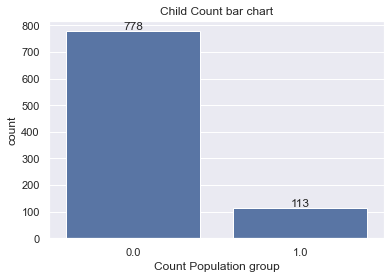

In [75]:
#p= titanic['child'].value_counts().plot.bar(explode = explode, autopct = '%1.2f%%')
sb.countplot('child', data = titanic,color = default_color )
ax2 = plt.title('Child Count bar chart');

category = [778,113]
for index,data in enumerate(category):
    plt.text(x=index, y=data, s=f'{data}',  ha='center', va='bottom')
    
ax2=plt.xlabel('Count Population group');

We see that out of **891** obeservation **778** are adults and **113** were children travelled with their parents

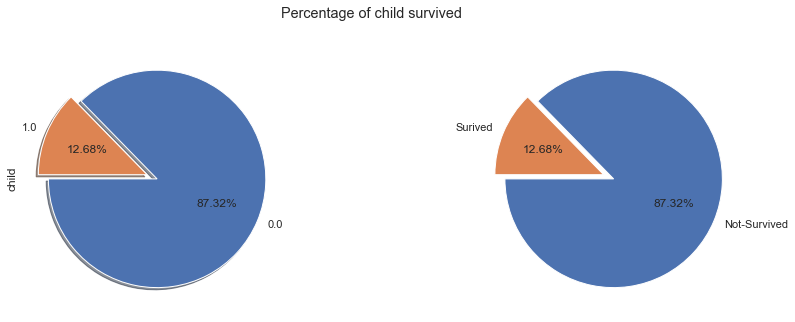

In [76]:
## Percentage of child survived
f,(ax1,ax2) = plt.subplots(ncols=2, sharey=False, sharex=False,
                          figsize=(15,5))

p= titanic['child'].value_counts().plot.pie(explode = explode, shadow=True,
                           startangle=180, autopct = '%1.2f%%', ax = ax1)
p=plt.suptitle('Percentage of child survived');

# Percentage of child survived
pie_show = titanic['child'].value_counts()
colors = ['#2492e5','#907bc7']
plt.pie(pie_show, labels=['Not-Survived', 'Surived'], startangle=180,explode = explode,
        counterclock=True, autopct='%1.2f%%')
#plt.title('Percentage of child survived');

plt.show()

#### The inference we can draw from our  investigation:

1. There are 891 observation in our dataset, **778** where adult and **113** are children which makes 
    up about **12.68%** in the grouped. However, **61** children survived the shipwreck out of 113.
2. The average age of survivors is 29, so young people tend to survive more.
2. The maximum age in our dataset is 80
3. According to our diagram, people who are under 18, they were more likely to survive than people that above age 18.


## FARE

### Does fare (passenger fare) affect the chances of surviving?

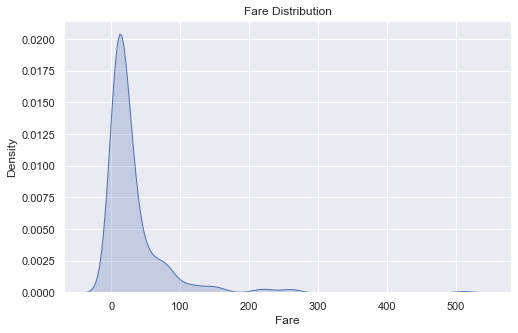

In [77]:
# Let's investigate the fare distribution amonge passenger
plt.figure(figsize=[8, 5])
sb.kdeplot(titanic['fare'], shade=True)
plt.xlabel('Fare')
plt.title('Fare Distribution')
plt.show()

Although our dataset cannot tell the specify currency used to purchased their ticket. However, majority passengers from our 
observation spend between **0 to 50** for their voyave.I am pretty sure those are passenger that belongs to the third class from the Pclass feature.

<Figure size 1080x576 with 0 Axes>

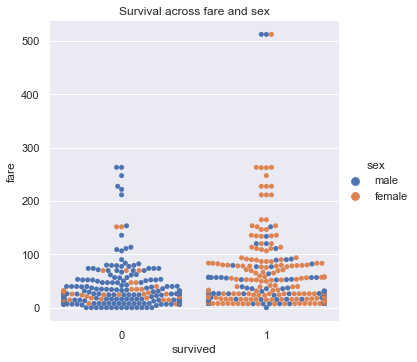

In [78]:
# plot survival against fare 
plt.figure(figsize = [15, 8])
sb.catplot(data=titanic, x="survived", y="fare", hue="sex", kind="swarm", s=5 )
plt.title('Survival across fare and sex');
plt.show();

Suprisingly, we can even count in our own eyes the number of men survived the accident. From our observation above ones can easily tell that most female passenger survived the ship wreck, maybe due to the number of women paid high fare **above 50** is not comparable to that of the men below 50. 

Only fewer women didn't survived the accident. 

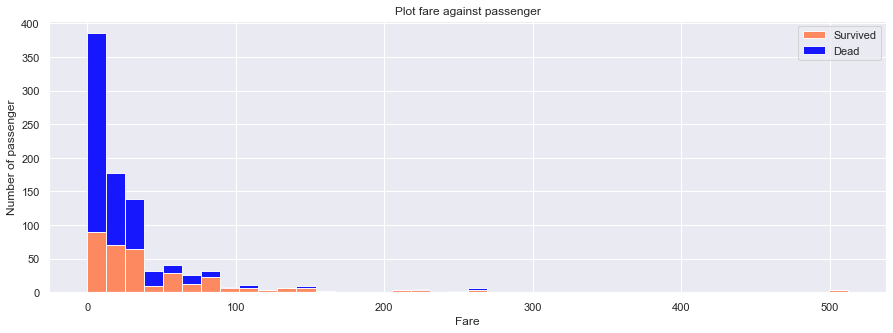

In [79]:
# let's plot survived base on fare paid
survived = titanic[titanic['survived'] == 1]['fare']
dead = titanic[titanic['survived'] == 0]['fare']

figure = plt.figure(figsize=(15,5))
plt.hist([survived, dead], stacked=True, color=['coral','blue'], alpha=0.9, bins=40, label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passenger')
plt.title('Plot fare against passenger')
plt.legend()
plt.show();

It seems that passengers with cheaper tickets were more likely to die. Binning of this data might be difficult since the data is far from being normally distributed

<Figure size 720x360 with 0 Axes>

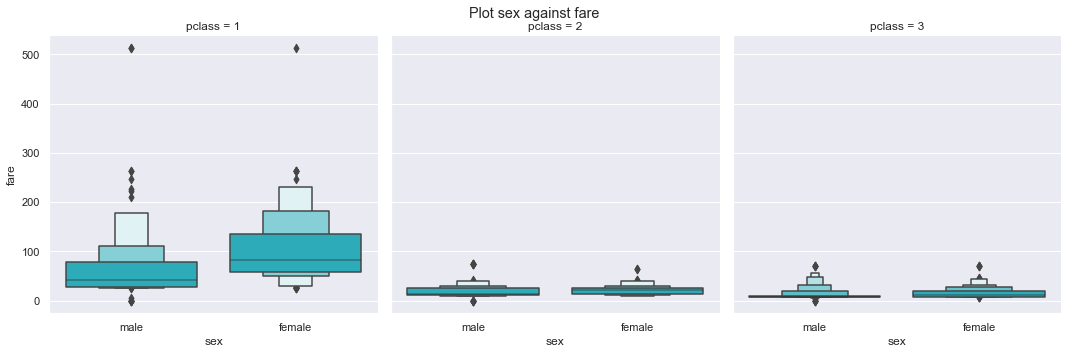

In [80]:
# Plot sex against fare
other_color = sb.color_palette('tab10')[9]
plt.figure(figsize=(10,5))
dip = sb.catplot(x = 'sex', y = 'fare', data = titanic, kind = 'boxen', col = 'pclass', color=other_color);
dip.fig.suptitle('Plot sex against fare');
dip.fig.subplots_adjust(top=0.9)
plt.show();

The females passengers paid higher fare than the males and most of the female occupied the first and second class in the Pclass.
Maybe male passenger tend to travelled in the third class because the 3rd class fare is low in price. Or it could be more service were offered to female traveller that's why their fare is high.

<Figure size 720x720 with 0 Axes>

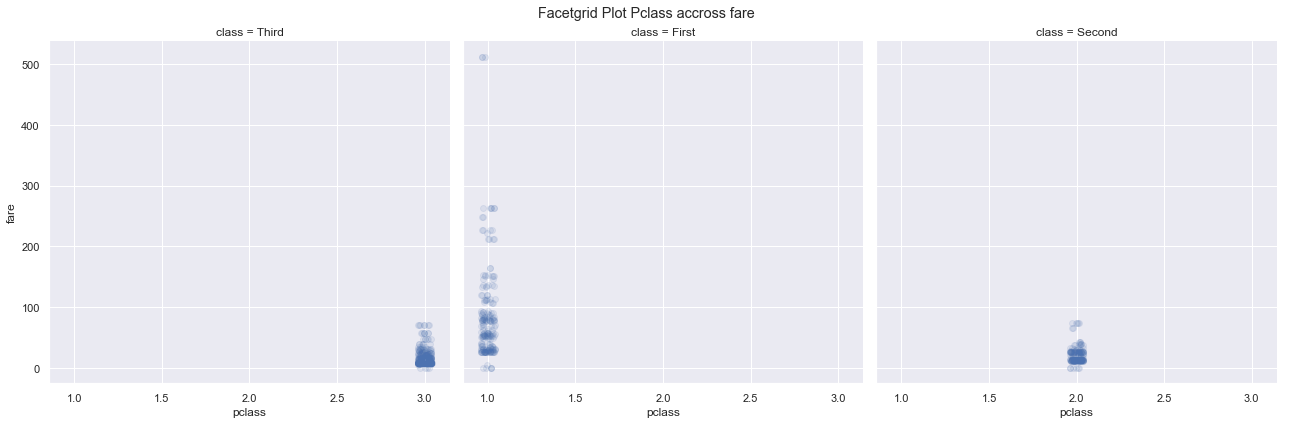

In [81]:
# FacetGrid Plot Pclass accross fare
plt.figure(figsize = [10, 10])
g=sb.FacetGrid(data=titanic, aspect=1, height=6, col='class', col_wrap=3)
g.map(sb.regplot, 'pclass', 'fare', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.suptitle('Facetgrid Plot Pclass accross fare')
g.fig.subplots_adjust(top=0.9)
g.add_legend();

plt.show();

Passenger in the first class compartment paid higher fare over 200, some even paid over 500 fare. whereas second and third passenger paid below 100 fare. 

<Figure size 864x432 with 0 Axes>

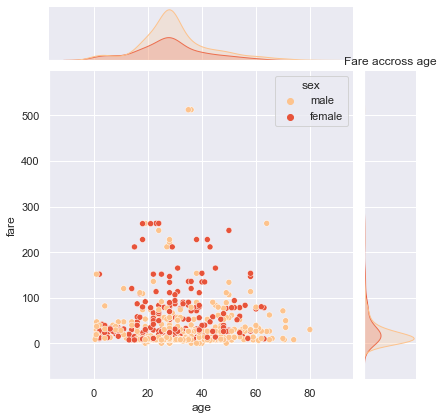

In [82]:
# Plot joint to further investigating
fig = plt.figure(figsize=(12,6))
sb.jointplot(x='age', y='fare',
               data=titanic, hue='sex', palette='OrRd')
plt.title('Fare accross age')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show();

There is high concentration of male passenger age between 20 to 40 paid fare below 100

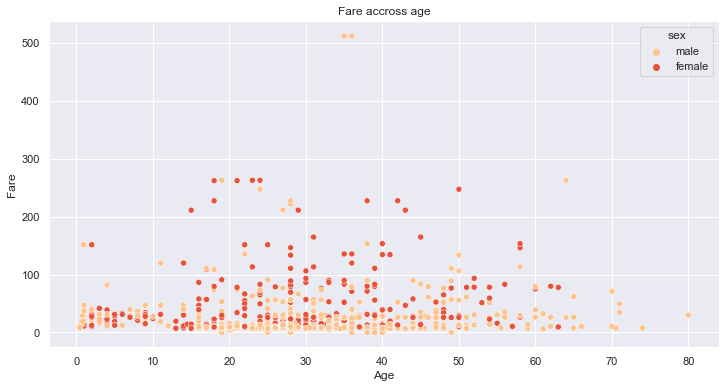

In [83]:
# let's plot age across fare
fig = plt.figure(figsize=(12,6))
sb.scatterplot(x='age', y='fare',
               data=titanic, hue='sex', palette='OrRd')
plt.title('Fare accross age')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

One thing I can take from the chart is that the fare for female passengers is higher than that of the male passengers. Some female passengers their fare are too high. You can compared this from the **boxplot** above you would see that the fare for female passenger in the first class compartment is very high. 

### Fare , Age vs. Class

We can see that female passengers from the first class compartment most spend **above 200** fare for the voyage. Also, there is even one female passenger whos fare is above **500**, probally this traveller might required some special needs.  While those in the second and third class paid fare are **below 100. 

The number of male passengers in the first class compartment fare **above 200 are quite few**. Majority from the second and third class compartment paid fare are **below 50**. Also male in the third class travelled more compared to female in the third class. 
Our take away is that Women tends to spend more when travilling  compare to men. This could be women like to travelled alonge with their kids.

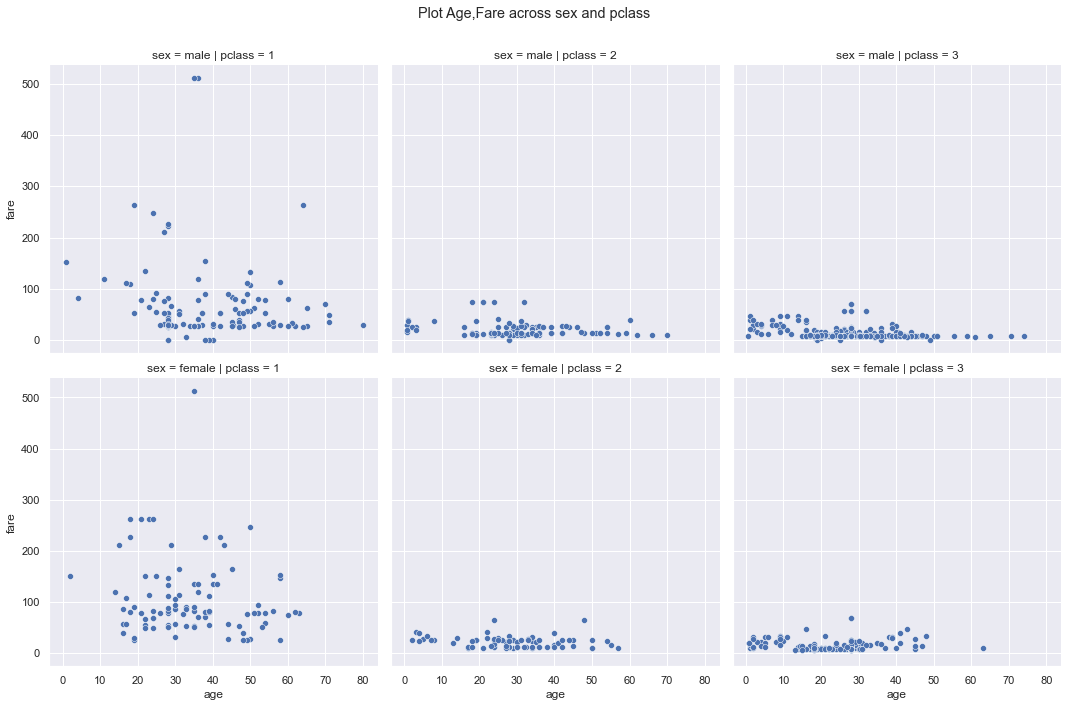

In [84]:
# Plot age across fare over row sex and column pclass
g=sb.relplot(x = 'age', y = 'fare', data = titanic, row = 'sex', col = 'pclass');
g.fig.suptitle('Plot Age,Fare across sex and pclass' )
g.fig.subplots_adjust(top=0.9)
plt.show()

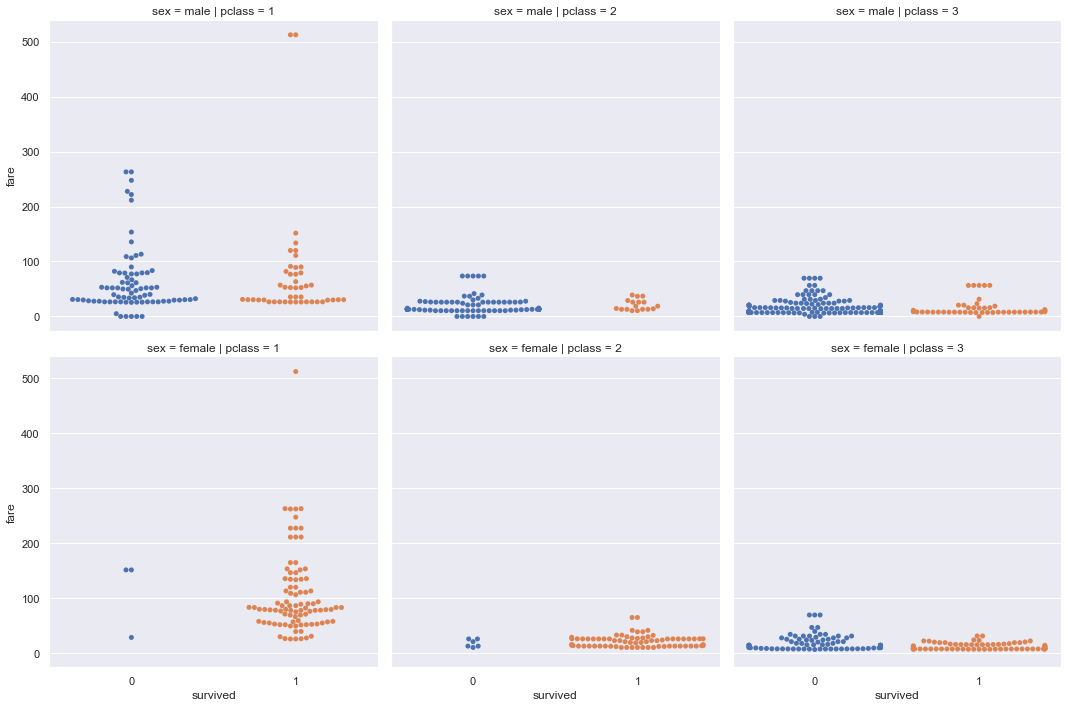

In [85]:
# Plot survival over fare by row sex col=pclass
sb.catplot(x = 'survived', y = 'fare', data = titanic, kind = 'swarm', row = 'sex', col = 'pclass');

Here we can see female passengers that are survived from the accident their fare are high for all the classes, but for male passenger even if they occupied the first class their survival rate is very low

### Summary

- The analysis showed that the attributes Gender, Class, Age and Fare are the important features to influce survival.
- Survived: Most of the people died in the shipwreck,  only around 300 people survived.
- Pclass: The majority of the people traveling, had tickets to the 3rd class. That is 1st class more likely survivied than other classes.
- Sex: There were more males than females aboard the ship, roughly double the amount.
- If one will look in the gender approach then one can say women were more likely to survive
- Fare: Passenger with high fare has higher chance to survived the accident 
 

In [86]:
!jupyter nbconvert Project_Communicate_Data_Finding2.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Project_Communicate_Data_Finding2.ipynb to slides
[NbConvertApp] Writing 798621 bytes to Project_Communicate_Data_Finding2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\python\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\python\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\python\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\python\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\python\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\python\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\python\li